In [62]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [63]:
data=pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [64]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [66]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [67]:
np.unique(data['Type'])

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [68]:
x=data.iloc[:,1:9]
x

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...
209,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [69]:
y=data.iloc[:,9]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

##### Splitting into train and test data

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)
x_train.shape,y_train.shape, x_test.shape,y_test.shape


((149, 8), (149,), (65, 8), (65,))

## K-Nearest Neighbors model

In [82]:
n_neighbors=np.array(range(1,20))
param_grid=dict(n_neighbors=n_neighbors)

#### Using Grid Search CV to get best params

In [83]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [84]:
print(grid.best_score_)
print(grid.best_params_)

0.657471264367816
{'n_neighbors': 14}


In [85]:
model = KNeighborsClassifier(n_neighbors=14)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [86]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    32
2    19
7    11
5     2
3     1
dtype: int64

In [87]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,7
Type,,,,,
1,17,2,0,0,0
2,10,11,1,0,1
3,3,1,0,0,0
5,0,4,0,2,0
6,1,0,0,0,2
7,1,1,0,0,8


In [88]:
np.mean(preds==y_test)

0.5846153846153846

In [89]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [90]:
preds = model.predict(x_test) 
pd.Series(preds).value_counts()

1    31
2    18
7     9
5     3
6     3
3     1
dtype: int64

In [91]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,6,7
Type,,,,,,
1,17,2,0,0,0,0
2,8,12,1,0,2,0
3,4,0,0,0,0,0
5,0,2,0,3,1,0
6,1,1,0,0,0,1
7,1,1,0,0,0,8


In [92]:
np.mean(preds==y_test)

0.6153846153846154

#### Visualizing accuracy for diff values of k

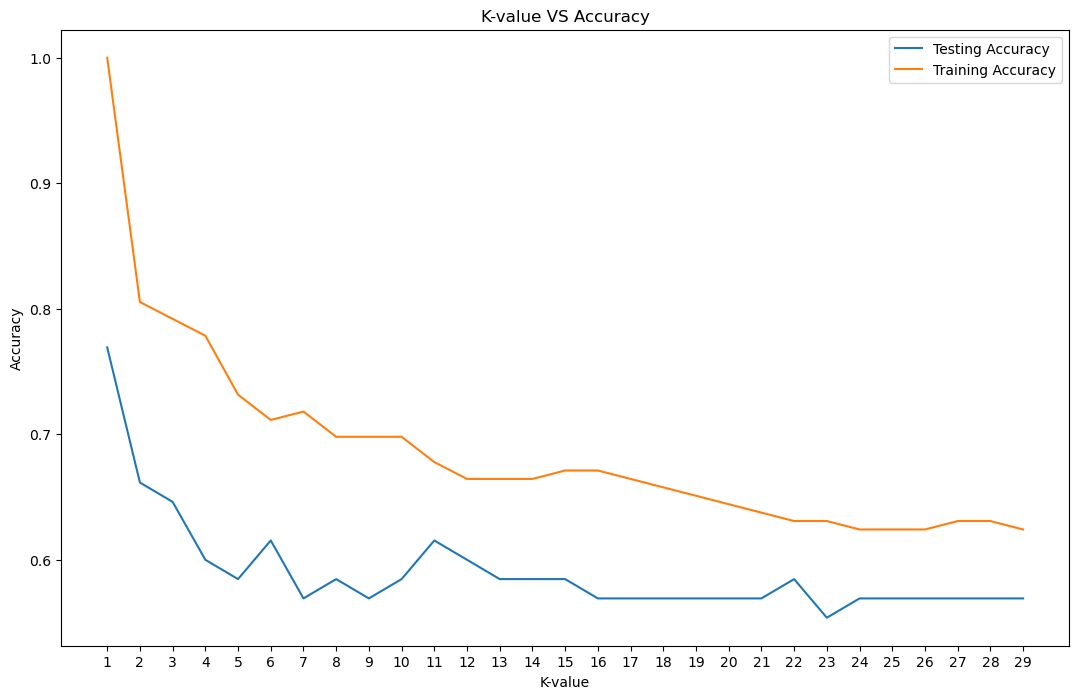

In [94]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_values = np.arange(1,30)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value VS Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
